# Project#1: Writing a Data Scientist Blog Post

> **In this project,**: I will analyze a Boston Airbnb Open Data Dataset and then report the findings by following the CRISP-DM process. I will use the Python libraries NumPy, pandas, Matplotlib , Seaborn and Sklearn within Anaconda.






## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Modeling and Evaluation</a></li>

</ul>

<a id='intro'></a>
## Introduction

> **Boston Airbnb Open Data**: This dataset shows information about homes people offer for rent in Boston, Massachusetts. It's part of Airbnb's efforts to provide unique and personalized travel experiences since 2008.



> **Questions to Answer**: <br> <br>
1- What are the top five neighborhoods in terms of property type (Apartment, House, Condominium, Townhouse, Bed & Breakfast, Loft, Other, Boat, Villa, Entire Floor, Dorm, Guesthouse, Camper/RV)? <br>
2- What are the percentages of hosts who are superhosts for each host response time (within an hour, within a few hours, within a day, a few days or more)? <br>
3- What are the median prices for each cancellation policy (strict, flexible, moderate, super_strict_30)? <br>
4- What is the distribution of prices for each property type (Apartment, House, Condominium, Townhouse, Bed & Breakfast, Loft, Other, Boat, Villa, Entire Floor, Dorm, Guesthouse, Camper/RV)?

In [1]:
# set up import statements for all of the packages I will use 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Cleaning

> **In this section**: I will load in the data, check for cleanliness, as well as delete the wrong data and trim and clean the dataset for analysis and modeling.


In [2]:
# Load the data 

df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df.shape

(3585, 95)

3585 = number of rows <br>
95 = number of columns

In [4]:
# To see the data type of each column and non-values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [5]:
# check for missing values  ( NaN values)
total_missing = df.isnull().sum()
percent_missing = (total_missing / len(df)) * 100
missing_data = pd.DataFrame({'Total': total_missing, 'Percent': percent_missing})
missing_data = missing_data.sort_values(by='Percent', ascending=False)
print(missing_data)

                              Total     Percent
has_availability               3585  100.000000
license                        3585  100.000000
neighbourhood_group_cleansed   3585  100.000000
jurisdiction_names             3585  100.000000
square_feet                    3529   98.437936
...                             ...         ...
is_location_exact                 0    0.000000
room_type                         0    0.000000
accommodates                      0    0.000000
bed_type                          0    0.000000
country                           0    0.000000

[95 rows x 2 columns]


In [6]:
# Remove columns with a missing value percentage greater than 30% and non-important columns.
 

columns_to_drop = ['has_availability', 'license', 'neighbourhood_group_cleansed', 'jurisdiction_names', 
                   'square_feet', 'monthly_price', 'weekly_price' , 'security_deposit', 'notes' , 'listing_url',
                   'scrape_id' , 'xl_picture_url' , 'medium_url','thumbnail_url','picture_url' , 'host_url',
                   'host_thumbnail_url' , 'host_picture_url','listing_url' , 'experiences_offered' , 'interaction',
                    'access' , 'cleaning_fee' , 'house_rules' , 'transit' , 'host_about' , 'neighborhood_overview' ]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.shape

(3585, 69)

3585 = number of rows <br>
69 = number of columns

In [8]:
df.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 

In [9]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

/var/folders/d6/dcj4p3g10yncq5d479xkjn2w0000gn/T/ipykernel_20316/3885790275.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [10]:
# Fill missing values in object columns with the most frequent value
df.fillna(df.mode().iloc[0], inplace=True)

In [11]:
# Check for missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   last_scraped                      3585 non-null   object 
 2   name                              3585 non-null   object 
 3   summary                           3585 non-null   object 
 4   space                             3585 non-null   object 
 5   description                       3585 non-null   object 
 6   host_id                           3585 non-null   int64  
 7   host_name                         3585 non-null   object 
 8   host_since                        3585 non-null   object 
 9   host_location                     3585 non-null   object 
 10  host_response_time                3585 non-null   object 
 11  host_response_rate                3585 non-null   object 
 12  host_a

In [12]:
df.columns

Index(['id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 

### Here, I will select the X training data and y, and preprocess it by encoding categorical variables and ensuring appropriate data types to facilitate model training.

In [13]:
# Room type value counts
df.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [14]:
# Identify unique values in the room_type 
unique_room_types = df['room_type'].unique()

# Create a mapping dictionary for room_type
room_type_mapping = {room_type: idx for idx, room_type in enumerate(unique_room_types)}

# Replace categorical values with numeric labels
df['room_type'] = df['room_type'].map(room_type_mapping)

In [15]:
# Check 
df.room_type.value_counts()

0    2127
1    1378
2      80
Name: room_type, dtype: int64

In [16]:
# Property type value counts
df.property_type.value_counts()

Apartment          2615
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [17]:
# Identify unique values in the property_type 
unique_property_types = df['property_type'].unique()

# Create a mapping dictionary for property_type
property_type_mapping = {property_type: idx for idx, property_type in enumerate(unique_property_types)}

# Replace categorical values with numeric labels
df['property_type'] = df['property_type'].map(property_type_mapping)

In [18]:
# Check
df.property_type.value_counts()

1     2615
0      562
2      231
5       54
4       41
7       39
11      17
9       12
3        6
6        4
10       2
8        1
12       1
Name: property_type, dtype: int64

In [19]:
# Neighbourhood value counts
df.neighbourhood.value_counts()

Allston-Brighton      907
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [20]:
# Identify unique values in the neighbourhood 
unique_neighbourhoods = df['neighbourhood'].unique()

# Create a mapping dictionary for neighbourhood
neighbourhood_mapping = {neighbourhood: idx for idx, neighbourhood in enumerate(unique_neighbourhoods)}

# Replace categorical values with numeric labels
df['neighbourhood'] = df['neighbourhood'].map(neighbourhood_mapping)

In [21]:
# Check
df.neighbourhood.value_counts()

1     907
2     314
11    298
5     291
4     249
14    216
25    195
17    174
9     125
13    117
10    116
3     103
15     79
7      78
16     68
0      50
23     35
18     33
19     26
8      25
12     20
21     13
28     13
20      8
6       8
26      8
27      7
24      4
22      3
29      2
Name: neighbourhood, dtype: int64

In [22]:
# Instant Bookable value counts

df.instant_bookable.value_counts()

f    2991
t     594
Name: instant_bookable, dtype: int64

In [23]:
# Identify unique values in the instant_bookable
unique_instant_bookable = df['instant_bookable'].unique()

# Create a mapping dictionary for instant_bookable
instant_bookable_mapping = {value: idx for idx, value in enumerate(unique_instant_bookable)}

# Replace categorical values with numeric labels
df['instant_bookable'] = df['instant_bookable'].map(instant_bookable_mapping)

In [24]:
# Check
df.instant_bookable.value_counts()

0    2991
1     594
Name: instant_bookable, dtype: int64

In [25]:
# Cancellation Policy value counts
df.cancellation_policy.value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [26]:
# Identify unique values in the cancellation_policy 
unique_cancellation_policies = df['cancellation_policy'].unique()

# Create a mapping dictionary for cancellation_policy
cancellation_policy_mapping = {policy: idx for idx, policy in enumerate(unique_cancellation_policies)}

# Replace categorical values with numeric labels
df['cancellation_policy'] = df['cancellation_policy'].map(cancellation_policy_mapping)

In [27]:
# check
df.cancellation_policy.value_counts()

2    1582
1     999
0     919
3      85
Name: cancellation_policy, dtype: int64

In [28]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/d6/dcj4p3g10yncq5d479xkjn2w0000gn/T/ipykernel_20316/1531488561.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


Clean price column: remove dollar signs, commas, and convert to float.

<a id='eda'></a>
## Exploratory Data Analysis

**1- What are the top five neighborhoods in terms of property type (Apartment, House, Condominium, Townhouse, Bed & Breakfast, Loft, Other, Boat, Villa, Entire Floor, Dorm, Guesthouse, Camper/RV)?**

In [29]:
print(neighbourhood_mapping)

{'Roslindale': 0, 'Allston-Brighton': 1, 'Jamaica Plain': 2, 'Mission Hill': 3, 'Fenway/Kenmore': 4, 'Back Bay': 5, 'Leather District': 6, 'Chinatown': 7, 'Hyde Park': 8, 'North End': 9, 'Roxbury': 10, 'South End': 11, 'Mattapan': 12, 'East Boston': 13, 'South Boston': 14, 'Charlestown': 15, 'West End': 16, 'Beacon Hill': 17, 'Theater District': 18, 'Downtown Crossing': 19, 'Downtown': 20, 'Financial District': 21, 'Government Center': 22, 'West Roxbury': 23, 'Chestnut Hill': 24, 'Dorchester': 25, 'Brookline': 26, 'Cambridge': 27, 'Somerville': 28, 'Harvard Square': 29}


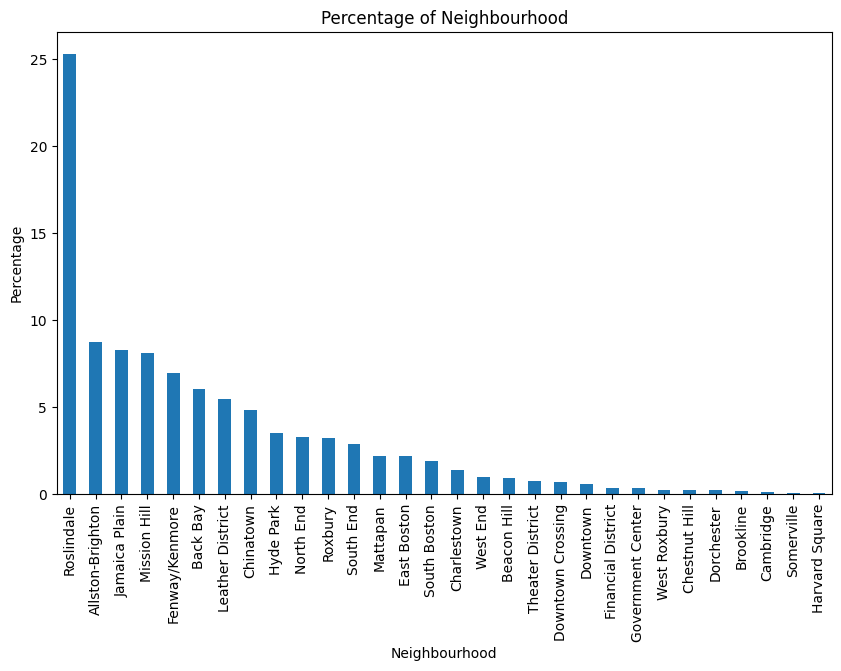

In [30]:
# Calculate the percentage of each neighborhood
neighbourhood_percentage = df['neighbourhood'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
neighbourhood_percentage.plot(kind='bar')
plt.title('Percentage of Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage')

# Set the tick labels on the x-axis using the mapping dictionary
tick_labels = [key for key in neighbourhood_mapping.keys()]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)

plt.show()

In [31]:
print(property_type_mapping)

{'House': 0, 'Apartment': 1, 'Condominium': 2, 'Villa': 3, 'Bed & Breakfast': 4, 'Townhouse': 5, 'Entire Floor': 6, 'Loft': 7, 'Guesthouse': 8, 'Boat': 9, 'Dorm': 10, 'Other': 11, 'Camper/RV': 12}


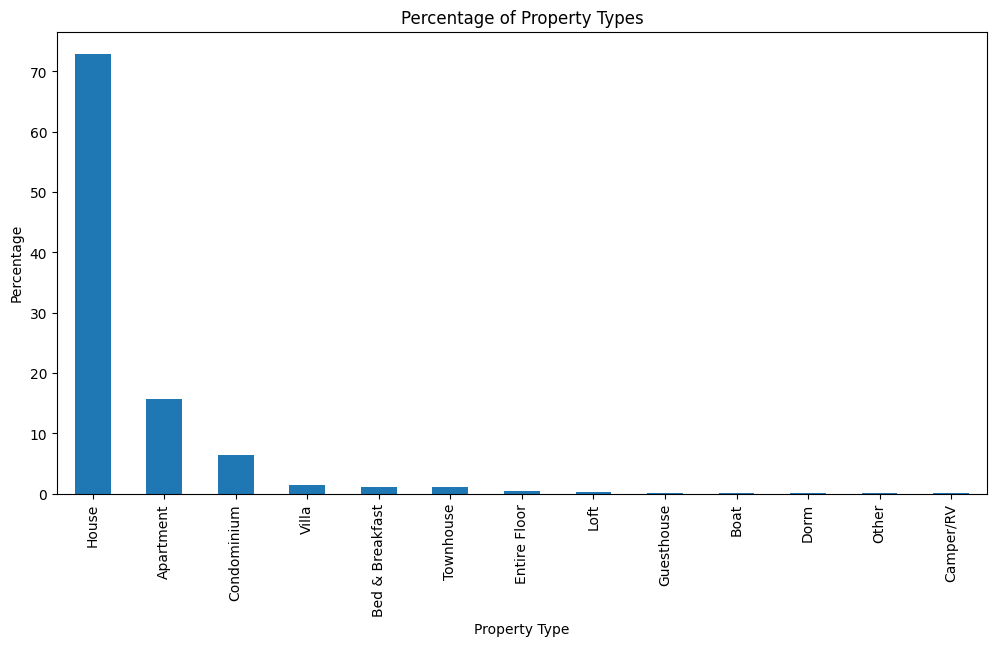

In [32]:
# Calculate the percentage of each property type
property_type_percentage = df['property_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
property_type_percentage.plot(kind='bar')
plt.title('Percentage of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Percentage')
# Set the tick labels on the x-axis using the mapping dictionary
tick_labels = [key for key in property_type_mapping.keys()]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.show()

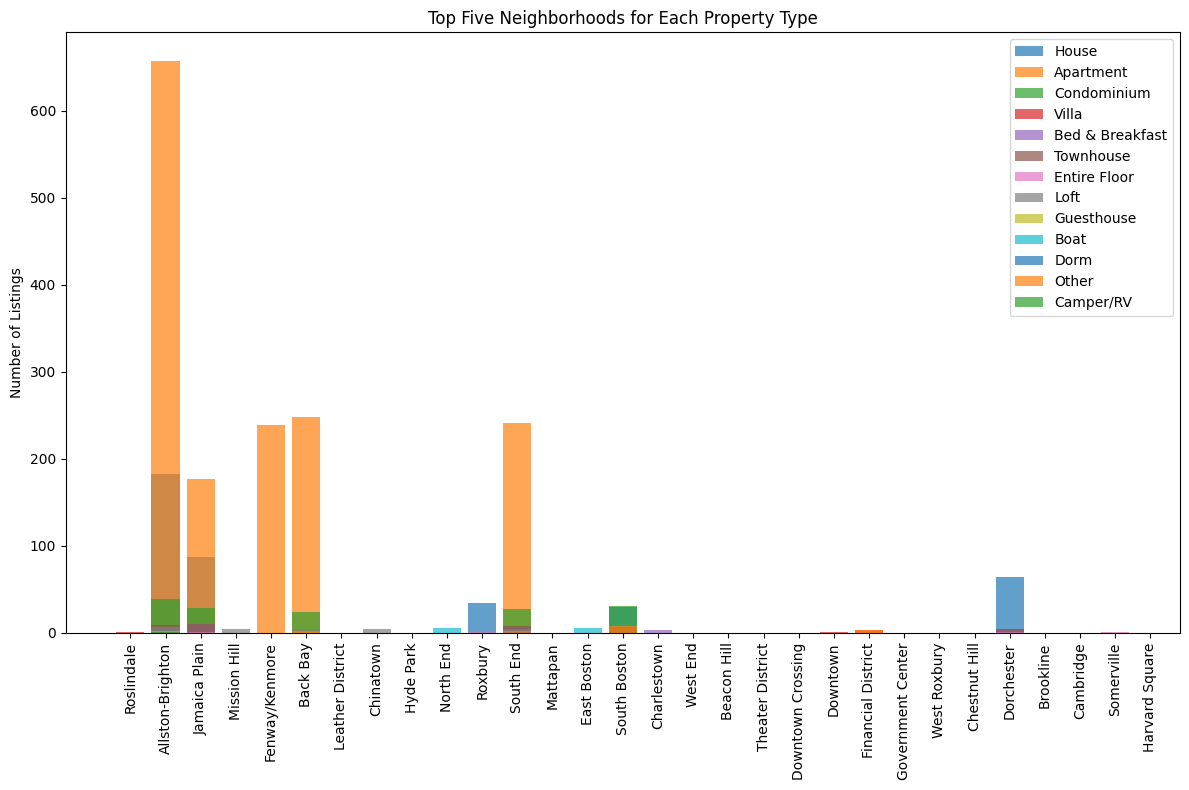

In [33]:
# Grouped bar plot
plt.figure(figsize=(12, 8))

# Group by property type and neighborhood
grouped = df.groupby(['property_type', 'neighbourhood']).size().reset_index(name='count')

# Sort the neighborhoods based on the count of each property type
grouped_sorted = grouped.sort_values(by=['property_type', 'count'], ascending=[True, False])

# Select the top five neighborhoods for each property type
top_neighborhoods = grouped_sorted.groupby('property_type').head(5)

for i, prop_type in enumerate(top_neighborhoods['property_type'].unique()):
    data = top_neighborhoods[top_neighborhoods['property_type'] == prop_type]
    # Replace property type with mapped value in the label
    prop_label = list(property_type_mapping.keys())[list(property_type_mapping.values()).index(prop_type)]
    plt.bar(data['neighbourhood'], data['count'], label=prop_label, alpha=0.7)  # Add alpha for transparency
    
tick_labels = [key for key in neighbourhood_mapping.keys()]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.ylabel('Number of Listings')
plt.title('Top Five Neighborhoods for Each Property Type')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


The top five neighborhoods in terms of property type are as follows:

Apartment: Allston-Brighton <br>
House: Allston-Brighton <br>
Condominium: Allston-Brighton <br>
Townhouse: Jamaica Plain <br>
Bed & Breakfast: Jamaica Plain<br>

**2- What are the percentages of hosts who are superhosts for each host response time (within an hour, within a few hours, within a day, a few days or more)?**

In [34]:
df.host_is_superhost.value_counts()

f    3178
t     407
Name: host_is_superhost, dtype: int64

In [35]:
df.host_response_time.value_counts()

within an hour        1855
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

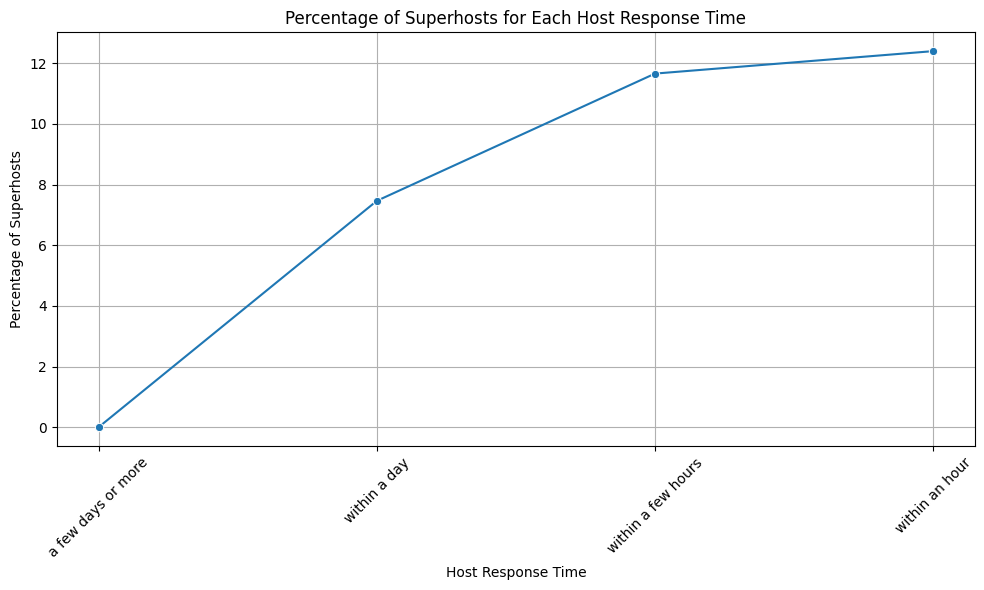

In [36]:
# Convert host_is_superhost to a binary numeric variable (0 or 1)
df['host_is_superhost'] = df['host_is_superhost'].map({'f': 0, 't': 1})

# Calculate the percentage of superhosts for each host response time category
percentage_superhosts = df.groupby('host_response_time')['host_is_superhost'].mean() * 100

# Plot the results using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=percentage_superhosts.index, y=percentage_superhosts.values, marker='o')
plt.xlabel('Host Response Time')
plt.ylabel('Percentage of Superhosts')
plt.title('Percentage of Superhosts for Each Host Response Time')
plt.xticks(rotation=45)  # for better readability
plt.grid(True)  #
plt.tight_layout()
plt.show()

In [37]:
percentage_superhosts

host_response_time
a few days or more     0.000000
within a day           7.462687
within a few hours    11.658456
within an hour        12.398922
Name: host_is_superhost, dtype: float64

Hosts responding within an hour have the highest superhost percentage (12.40%), followed by those within a few hours (11.66%), within a day (7.46%), and no superhosts for hosts taking a few days or more.

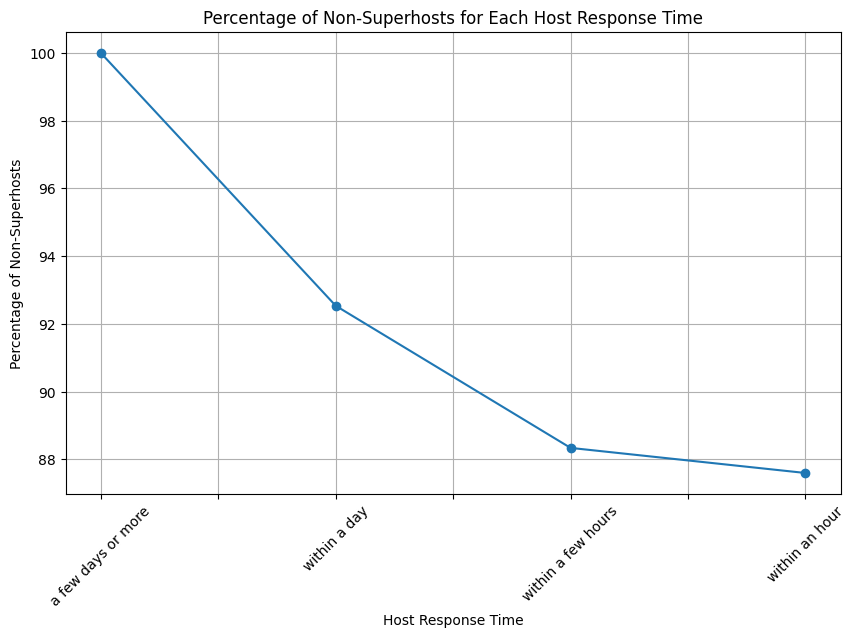

In [38]:
# Calculate the percentage of non-superhosts for each host response time category
percentage_non_superhosts = 100 - (df.groupby('host_response_time')['host_is_superhost'].mean() * 100)

# Plot the results using a line plot
plt.figure(figsize=(10, 6))
percentage_non_superhosts.plot(marker='o')
plt.xlabel('Host Response Time')
plt.ylabel('Percentage of Non-Superhosts')
plt.title('Percentage of Non-Superhosts for Each Host Response Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

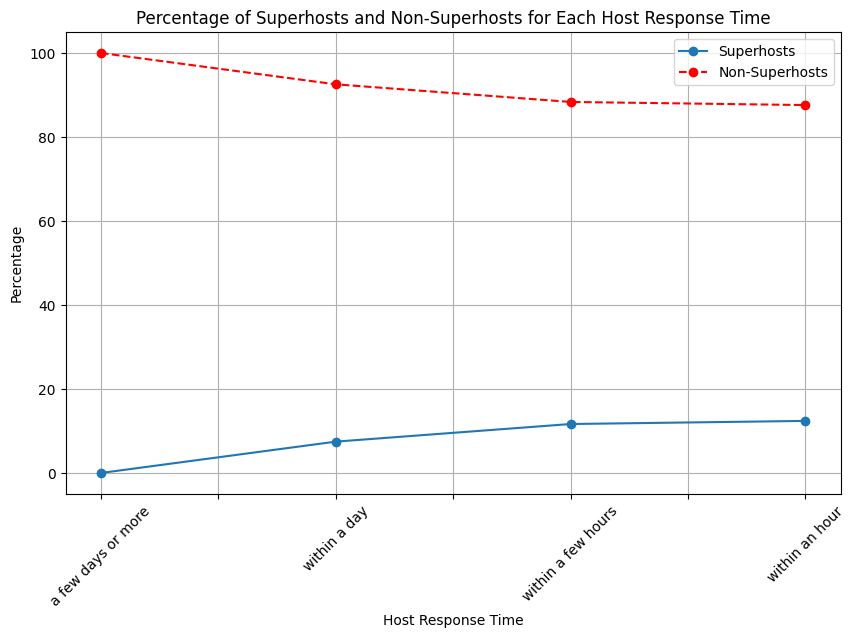

In [39]:
# Calculate the percentage of superhosts for each host response time category
percentage_superhosts = df.groupby('host_response_time')['host_is_superhost'].mean() * 100

# Calculate the percentage of non-superhosts for each host response time category
percentage_non_superhosts = 100 - percentage_superhosts

# Plot the results using a line plot
plt.figure(figsize=(10, 6))
percentage_superhosts.plot(marker='o', label='Superhosts')
percentage_non_superhosts.plot(marker='o', linestyle='--', color='red', label='Non-Superhosts')
plt.xlabel('Host Response Time')
plt.ylabel('Percentage')
plt.title('Percentage of Superhosts and Non-Superhosts for Each Host Response Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
percentage_superhosts

host_response_time
a few days or more     0.000000
within a day           7.462687
within a few hours    11.658456
within an hour        12.398922
Name: host_is_superhost, dtype: float64

In [41]:
percentage_non_superhosts

host_response_time
a few days or more    100.000000
within a day           92.537313
within a few hours     88.341544
within an hour         87.601078
Name: host_is_superhost, dtype: float64

**3- What are the median prices for each cancellation policy (strict, flexible, moderate, super_strict_30)?**

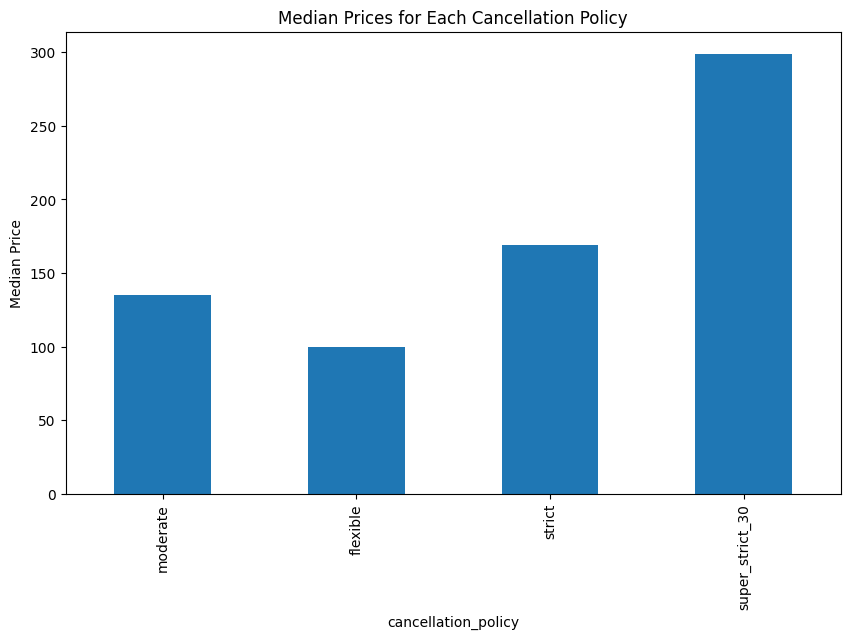

In [42]:
# Group the data by cancellation_policy and calculate the median price for each group
median_prices = df.groupby('cancellation_policy')['price'].median()

# Plot the median prices using a bar plot
median_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Median Prices for Each Cancellation Policy')
tick_labels = [key for key in cancellation_policy_mapping.keys()]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.ylabel('Median Price')
plt.show()

In [43]:
cancellation_policy_mapping

{'moderate': 0, 'flexible': 1, 'strict': 2, 'super_strict_30': 3}

In [44]:
median_prices

cancellation_policy
0    135.0
1    100.0
2    169.0
3    299.0
Name: price, dtype: float64

The median prices for listings with different cancellation policies are 100.00 for flexible, 135.00 for moderate, 169.00 for strict, and 299.00 for super_strict_30.

**4- What is the distribution of prices for each property type (Apartment, House, Condominium, Townhouse, Bed & Breakfast, Loft, Other, Boat, Villa, Entire Floor, Dorm, Guesthouse, Camper/RV)?**

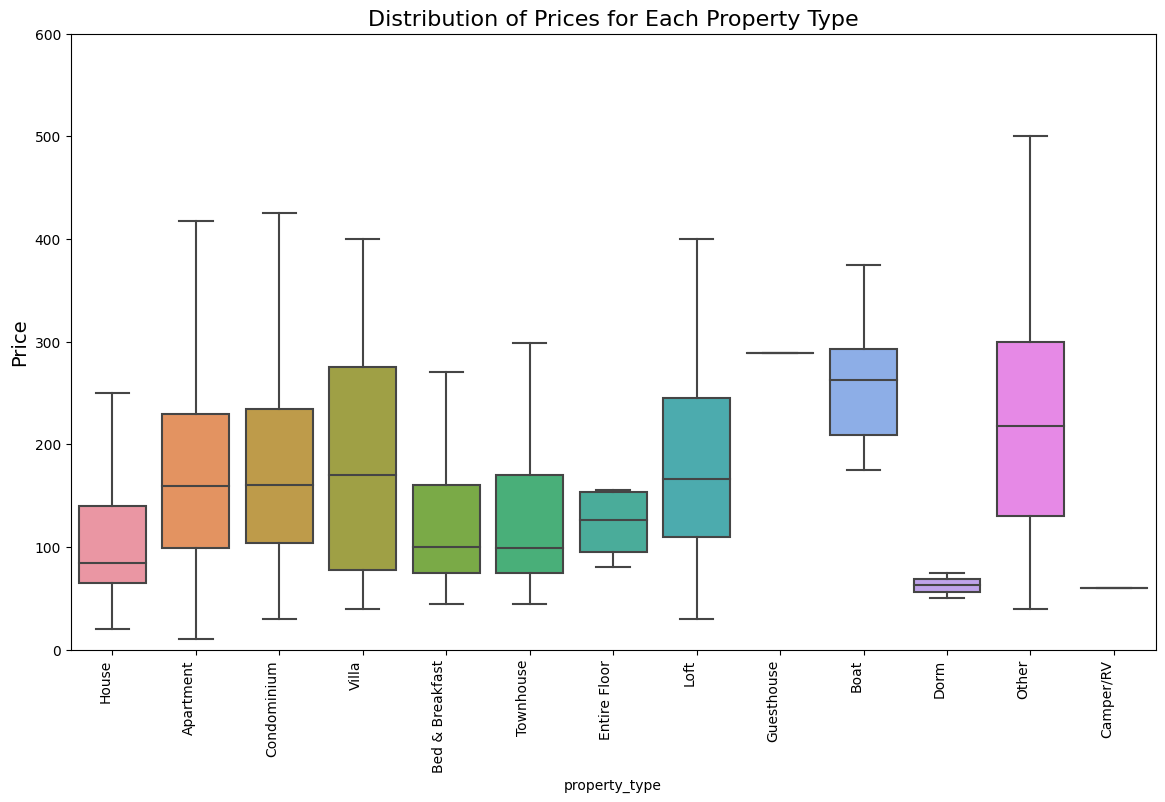

In [45]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a boxplot with swarmplot overlay, removing outliers
sns.boxplot(x='property_type', y='price', data=df, showfliers=False)

plt.ylim(0, 600)  # Adjust the upper limit as needed
plt.xticks(rotation=45, ha='right')
tick_labels = [key for key in property_type_mapping.keys()]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=90)
plt.ylabel('Price', fontsize=14)
plt.title('Distribution of Prices for Each Property Type', fontsize=16)

plt.show()

In [46]:
# Group the data by property type
grouped = df.groupby('property_type')

# Calculate statistics for each property type
property_stats = grouped['price'].agg(['min', 'max', 'median', lambda x: x.quantile(0.75) - x.quantile(0.25)])

# Rename the columns for clarity
property_stats.columns = ['Min Price', 'Max Price', 'Median Price', 'Interquartile Range']

# Print the statistics for each property type
print(property_stats)

               Min Price  Max Price  Median Price  Interquartile Range
property_type                                                         
0                   20.0     1300.0          84.5                75.00
1                   10.0     4000.0         159.0               130.00
2                   30.0      700.0         160.0               130.50
3                   40.0      400.0         170.0               197.75
4                   44.0      350.0         100.0                85.00
5                   44.0      700.0          99.0                95.00
6                   80.0      155.0         126.5                58.50
7                   30.0      500.0         166.0               135.00
8                  289.0      289.0         289.0                 0.00
9                  175.0      425.0         262.5                83.50
10                  50.0       75.0          62.5                12.50
11                  40.0      500.0         218.0               170.00
12    

In [47]:
print(property_type_mapping)

{'House': 0, 'Apartment': 1, 'Condominium': 2, 'Villa': 3, 'Bed & Breakfast': 4, 'Townhouse': 5, 'Entire Floor': 6, 'Loft': 7, 'Guesthouse': 8, 'Boat': 9, 'Dorm': 10, 'Other': 11, 'Camper/RV': 12}


Property prices vary significantly across different types, with Apartments ranging from 10 to 4000, while Guesthouses have a fixed price of 289. This diversity highlights the unique pricing dynamics within each property category.

<a id='model'></a>
## Modeling and Evaluation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Features selection
selected_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'room_type', 
                     'property_type', 'neighbourhood', 'latitude', 'longitude', 
                     'availability_30', 'availability_60', 'availability_90', 
                     'review_scores_rating', 'review_scores_accuracy', 
                     'review_scores_cleanliness', 'review_scores_checkin', 
                     'review_scores_communication', 'review_scores_location', 
                     'review_scores_value', 'number_of_reviews', 'instant_bookable', 
                     'cancellation_policy']

# Subset dataframe with selected features
X = df[selected_features]

# Target variable (price)
y = df['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
model_score = rf_model.score(X_test, y_test)
print("Random Forest Model R^2 Score:", model_score)

Random Forest Model R^2 Score: 0.2219723251457829


The R^2 score is chosen as a metric for its simplicity and interpretability. It quantifies how well the model explains the variance in the target variable based on the features. 